In [28]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [9]:
DATASET_PATH = '/content/drive/MyDrive/Projects/NLP/FINAL/dataset/Preprocessing_HateSpeechDataset.csv'

In [10]:
tweet_df = pd.read_csv(DATASET_PATH)
tweet_df = tweet_df.dropna()
tweet_df

,Clean,Label
0,currently appear engaged edit war according re...,0
1,know people think america change always racist...,0
2,full protection article excessive wikipedia tw...,0
3,added row popular vote table reflect estimate ...,0
4,arbor notification participated eye thread led...,0
...,...,...
141849,fact felt need use term demonstrates illiterat...,1
141850,gay name get take criticism loser question rea...,1
141851,wah tell communist faggot jeffrey fuck quit sh...,1
141852,vandalism please stop continue vandalize page ...,1


In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(tweet_df, test_size=0.3, stratify=tweet_df['Label'], random_state=42)

X_train = train['Clean'].values.astype(str)
y_train = train['Label']

X_test = test['Clean'].values.astype(str)
y_test = test['Label']

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(99297,)
(42557,)
(99297,)
(42557,)


In [51]:
import pickle

with open('/content/drive/MyDrive/Projects/NLP/FINAL/Pickle/TFIDFVectorizer.pkl', 'rb') as file:
  tfidf = pickle.load(file)
with open('/content/drive/MyDrive/Projects/NLP/FINAL/Pickle/tfidf2.pickle', 'rb') as file:
  tfidf2 = pickle.load(file)
with open('/content/drive/MyDrive/Projects/NLP/FINAL/Pickle/BLSTM.pkl', 'rb') as file:
  blstm = pickle.load(file)
with open('/content/drive/MyDrive/Projects/NLP/FINAL/Pickle/LSTM.pkl', 'rb') as file:
  lstm = pickle.load(file)
with open('/content/drive/MyDrive/Projects/NLP/FINAL/Pickle/LogisticRegression.pkl', 'rb') as file:
  logres = pickle.load(file)
with open('/content/drive/MyDrive/Projects/NLP/FINAL/Pickle/MultinomialNaiveBayes.pkl', 'rb') as file:
  mnb = pickle.load(file)
with open('/content/drive/MyDrive/Projects/NLP/FINAL/Pickle/SVC.pkl', 'rb') as file:
  svc = pickle.load(file)

In [52]:
X_test_for_mnb = tfidf.transform(X_test)
X_test_for_ml = tfidf2.transform(X_test)

In [53]:
y_pred_lr = logres.predict(X_test_for_ml)
y_pred_mnb = mnb.predict(X_test_for_mnb)
y_pred_svc = svc.predict(X_test_for_ml)

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 500
max_length = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
labels = tweet_df['Label']

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(tweet_df['Clean'].astype(str))

sequences = tokenizer.texts_to_sequences(tweet_df['Clean'].astype(str))

padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

_, X_rem, _, y_rem = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)

print(X_rem.shape)
print(y_rem.shape)

(42557, 50)
(42557,)


In [42]:
y_pred_blstm = blstm.predict(X_rem)
y_pred_blstm = [1 if prob > 0.5 else 0 for prob in y_pred_blstm]
y_pred_blstm = np.array(y_pred_blstm)

y_pred_lstm = lstm.predict(X_rem)
y_pred_lstm = [1 if prob > 0.5 else 0 for prob in y_pred_lstm]
y_pred_lstm = np.array(y_pred_lstm)

1330/1330 [==============================] - 28s 21ms/step


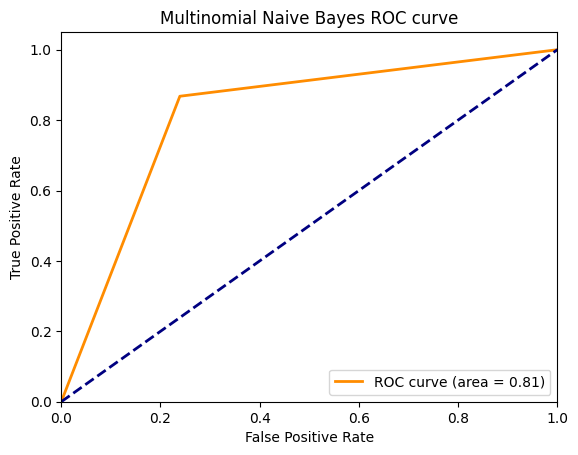

In [43]:
from sklearn.metrics import roc_curve, auc,  roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_mnb)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multinomial Naive Bayes ROC curve')
plt.legend(loc="lower right")
plt.show()

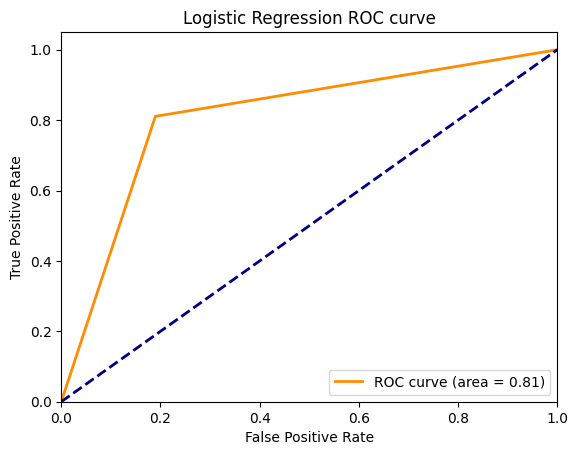

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc="lower right")
plt.show()

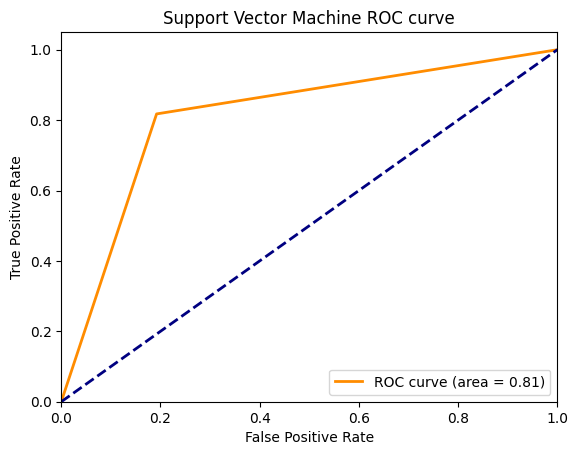

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Machine ROC curve')
plt.legend(loc="lower right")
plt.show()

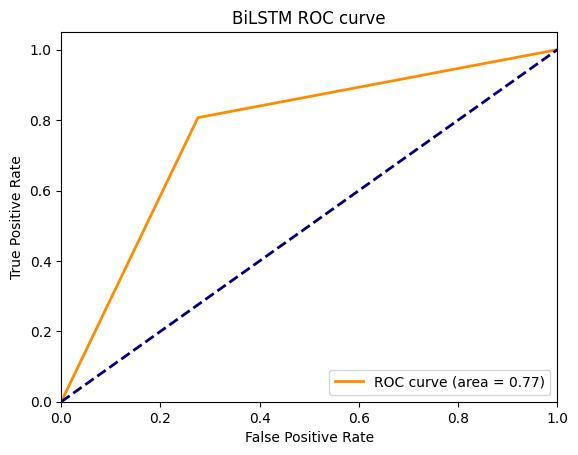

In [54]:
y_rem = np.array(y_rem)
fpr, tpr, thresholds = roc_curve(y_rem, y_pred_blstm)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BiLSTM ROC curve')
plt.legend(loc="lower right")
plt.show()

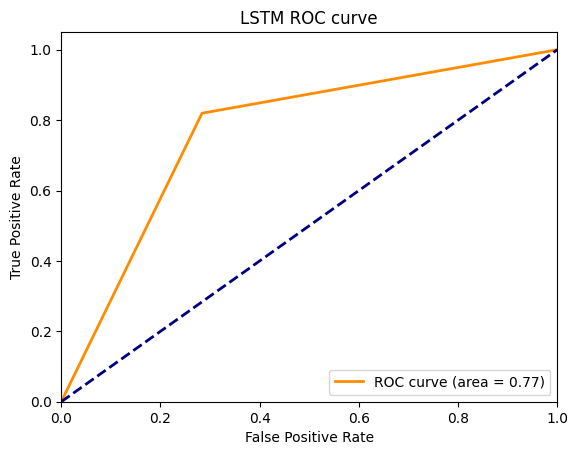

In [55]:
fpr, tpr, thresholds = roc_curve(y_rem, y_pred_lstm)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LSTM ROC curve')
plt.legend(loc="lower right")
plt.show()